In [91]:
# Define input and output conditions
par1type = 1  # The first parameter supplied is of type "1", which means "alkalinity"
par1 = 2400  # value of the first parameter
par2type = 3  # The second parameter supplied is of type "3", which means "pH"
par2 = 7.8  # value of the second parameter
sal = 35  # Salinity of the sample
tempin = 10  # Temperature at input conditions
tempout = 10  # Temperature at output conditions
presin = 0  # Pressure    at input conditions
presout = 0  # Pressure    at output conditions
sil = 50  # Concentration of silicate  in the sample (in umol/kg)
po4 = 2  # Concentration of phosphate in the sample (in umol/kg)
pHscale = 1  # pH scale at which the input pH is reported ("1" means "Total Scale")
k1k2c = 4  # Choice of H2CO3 and HCO3- dissociation constants K1 and K2 ("4" means "Mehrbach refit")
kso4c = 1  # Choice of HSO4- dissociation constants KSO4 and boron:sal ("1" means "Dickson" and "Uppstrom")
print('Conditions have been defined!')


# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS

par2 = 8.0 # ph 8


CO2dict = pyco2.sys(par1, par2, par1type, par2type,
                    salinity=sal, temperature=tempin, temperature_out=tempout,
                    pressure=presin, pressure_out=presout,
                    total_silicate=sil, total_phosphate=po4,
                    opt_pH_scale=pHscale, opt_k_carbonic=k1k2c, opt_k_bisulfate=kso4c)
print('ph '+str(par2))
aq_co2_percent = ((CO2dict['aqueous_CO2']/CO2dict['dic'])*100)
co3_percent = ((CO2dict['carbonate_out']/CO2dict['dic'])*100)
h2co3_percent = ((CO2dict['bicarbonate_out']/CO2dict['dic'])*100)
print(aq_co2_percent)
print(co3_percent)
print(h2co3_percent)
print(aq_co2_percent + co2_percent + h2co3_percent)

par2 = 4.0 # ph 4

CO2dict = pyco2.sys(par1, par2, par1type, par2type,
                    salinity=sal, temperature=tempin, temperature_out=tempout,
                    pressure=presin, pressure_out=presout,
                    total_silicate=sil, total_phosphate=po4,
                    opt_pH_scale=pHscale, opt_k_carbonic=k1k2c, opt_k_bisulfate=kso4c)

print(' ')
print('ph '+str(par2))
aq_co2_percent2 = ((CO2dict['aqueous_CO2']/CO2dict['dic'])*100)
co3_percent2 = ((CO2dict['carbonate_out']/CO2dict['dic'])*100)
h2co3_percent2 = ((CO2dict['bicarbonate_out']/CO2dict['dic'])*100)
print(aq_co2_percent2)
print(co3_percent2)
print(h2co3_percent2)
print(aq_co2_percent2 + co3_percent2 + h2co3_percent2)


Conditions have been defined!
ph 8.0
0.916332547123486
5.738260014353322
93.34540743852318
97.94052484879991
 
ph 4.0
98.99158156640289
6.199053346334283e-06
1.0084122345437578
99.99999999999999


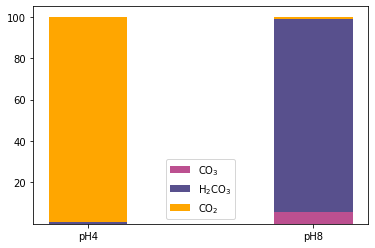

In [117]:
import matplotlib.pyplot as plt


labels = ['pH4', 'pH8']
co3 = [co3_percent2,co3_percent]
h2co3 = [h2co3_percent2,h2co3_percent]
co2 = [aq_co2_percent2,aq_co2_percent]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
# fig, ax = plt.subplots(figsize=(10,10))

ax.bar(labels, co3, width, label='CO$_3$',color='#bc5090')
ax.bar(labels, h2co3, width,bottom=co3, label='H$_2$CO$_3$',color='#58508d')
ax.bar(labels, co2, width, bottom =np.add(co3,h2co3),label='CO$_2$',color='#ffa600')


# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.legend()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/projects/SeaCURE/figures/ph_percent.svg')
plt.show()

In [97]:
np.add(co2,co3)

array([ 6.65459256, 98.99158777])